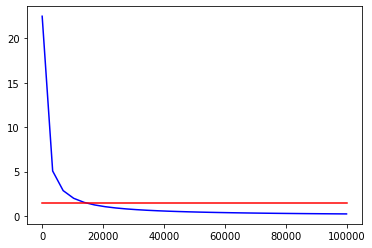

(0.22285057330621436, 22.507907903927652)

In [19]:
from numpy import pi,sqrt
import numpy as np
from matplotlib import pyplot as plt

def get_transfer_func(Cg,Cf,R1,R2):
    ## -20dB / decade
    return lambda s:(1+Cg*(R1+R2)*s+Cg*Cf*R1*R2*s**2)**-1

def sallen_key(Cg,Cf,R1,R2):
    f_cutoff=1/(2*pi)*1/sqrt(R1*R2*Cf*Cg)
    Q=(2*pi*f_cutoff)*(R1+R2)*Cg
    H=get_transfer_func(Cg,Cf,R1,R2)
    return f_cutoff,Q,H
    

Rpot=np.linspace(0,1e5,30)

R1=1e3+Rpot

R2=R1
Cf=10e-6 #F
Cg=(1/2)*10e-6#F

f_cutoff,Q,_=sallen_key(Cg,Cf,R1,R2)

plt.plot(Rpot,f_cutoff, color="blue")
plt.plot(Rpot,Q,color='red')
plt.show()
np.min(f_cutoff),np.max(f_cutoff)


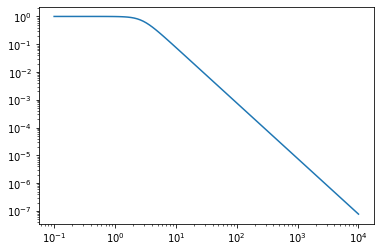

In [21]:
R1=np.mean(R1)
R2=R1
H=get_transfer_func(Cg,Cf,R1,R2)
S_vals=1j*np.logspace(-1,4,100)
plt.loglog(np.abs(S_vals),np.abs(H(S_vals)))

In [29]:
np.abs(H(1j*100))/np.abs(H(1j*1000))

99.99997043991578

In [30]:

Cf=47e-9 #F
Cg=(1/2)*47e-9#F
R1=20e3
R2=20e3
sallen_key(Cg,Cf,R1,R2)

(239.4458287651878,
 1.414213562373095,
 <function __main__.get_transfer_func.<locals>.<lambda>(s)>)